# Final Project: Introduction to Evolution and Fitness Maximization
## Author: Yuval Margules
**yuvalmargules@gmail.com**
### instructor: Dr. Yoav Ram

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

import scipy.stats
from scipy.interpolate import CubicSpline
from scipy.stats import multivariate_normal

import seaborn as sns
sns.set_context('notebook')

from IPython.display import Image
from IPython.core.display import HTML 

import warnings
warnings.filterwarnings('ignore')

red, blue, green, purple, orange, yellow = sns.color_palette('Set1', 6)

%matplotlib inline

 ### *''This preservation of favourable variations, and the rejection of injurious variations, I call Natural Selection''* ###
(The Origin of Species, Charles Darwin 1959)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Charles_Darwin_seated_crop.jpg/1200px-Charles_Darwin_seated_crop.jpg" width="250"/>

**Background:**

Darwin was 22 old when he attented a 5 years voyage on HMS Beagle. He spent most of that time on land investigating geology and making natural history collections. Right when he got back to England he was speculating in his notebook on the possibility that "one species does change into another" to explain the geographical distribution of living species. His ideas and findings were integrated into his famous book "The Origin of Species" and is still considered one of the most brilliant minds to be ever made. 

This project will concentrate on a part among his collection, "Darwin's Finches" and its later findings. On his collection, there were different finches where once thought to be a single species, but soon it was found out that those finches were obviously different species. Our motivation is to have a better understanding on how these changes occur, what Natural Selection prefers and which variables are involved. 

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B0122268652000031-gr6.jpg" width="400">

I chose to focus on phenotypes and condition changes and not on population genetics, variations etc. 
- We will review variables in the evolutionary process such as climate, food supply, competition, invasion and how responsible they are for changes.
- We will examine how adaptation takes place and how species react.
- We will further see how same species make different adjustments under different geographic distributions, and its path for either survival or extinction.

My *hypothesis* is that conditions differ from time to time, and therefore favorable traits change accordingly. Those who are not well adapted will perish and natural selection would make advantagous traits spread out.

By building deterministic and stochastic models from simple to more complex I will try to describe the data and variables which affect populations, also to find different possibilities. Finally, using population dynamics to have a better understanding of the role of competition.


In [3]:
#starting by importing fortis & scandens data over 40 year
fortis = pd.read_csv('https://raw.githubusercontent.com/yuvalmargules/Final-Project/master/data/40years/Fig.%2001-06.csv',  lineterminator='\r')
scandens = pd.read_csv('https://raw.githubusercontent.com/yuvalmargules/Final-Project/master/data/40years/Fig.%2001-07.csv',   lineterminator='\r')

fortis.dropna(inplace=True)
scandens.dropna(inplace=True)

We shall start by glancing at 40 years recorded data(Grant and Grant) of two species of finches, Geospiza Fortis(medium ground finch) and Geospiza Scandens(small cactus finch)
<img src="https://scientificillustration.elgusanobarrenador.com/images/geospizas.jpg" width="400">


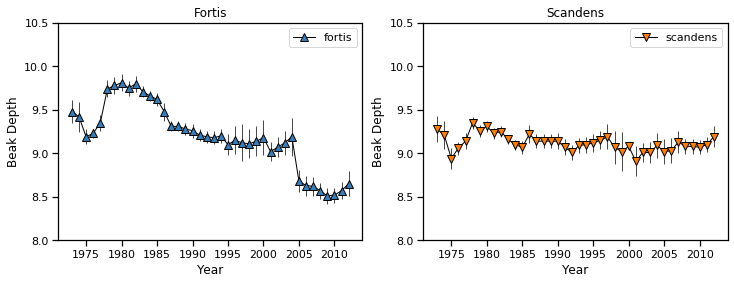

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))

# Fortis's Beak Depth changes over the years coupled with Confidence Interval
ax[0].plot(fortis['Year'].astype('int64'), fortis['Beak depth'].astype('float64'), '-k^',
           lw= 1 ,markersize=8, markerfacecolor= blue, label= 'fortis'),
ax[0].errorbar(fortis['Year'].astype('int64'), fortis['Beak depth'].astype('float64'),
               fortis['CI Beak depth'].astype('float64'), ls='',color = 'k', elinewidth= 0.7)                 

# Scandens Beak Depth changes over the years coupled with Confidence Interval
ax[1].plot(scandens['Year'].astype('int64'), scandens['Beak depth'], '-vk',
           lw= 1,markersize=8, markerfacecolor= orange, label= 'scandens')
ax[1].errorbar(scandens['Year'].astype('int64'), scandens['Beak depth'].astype('float64'),
               scandens['CI Beak depth'].astype('float64'), ls='',color = 'k', elinewidth= 0.7)                 

ax[0].set(title='Fortis', xlabel='Year', ylabel = 'Beak Depth', yticks= np.arange(8,11,0.5))
ax[1].set(title='Scandens', xlabel='Year', ylabel = 'Beak Depth', yticks= np.arange(8,11,0.5))


ax[0].legend()
ax[1].legend()
plt.show()

In [12]:
# rainfall record
rainfall = pd.read_csv('https://raw.githubusercontent.com/yuvalmargules/Final-Project/master/data/40years/Fig.%2004-12.csv',  lineterminator='\r')
rain_data = rainfall.copy() # for future usage
# seeds record
seeds = pd.read_csv('https://raw.githubusercontent.com/yuvalmargules/Final-Project/master/data/40years/Fig.%2004-13.csv',  lineterminator='\r')
rainfall['Year'] = rainfall['Year'].astype('int64') # matching time frame for the seeds timeline
rainfall = rainfall[rainfall['Year'] < 1992]
rainfall = rainfall[1975 < rainfall['Year']]
rainfall.head()

,Year,"Rain, mm"
3,1976,135
4,1977,24
5,1978,137
6,1979,69
7,1980,53


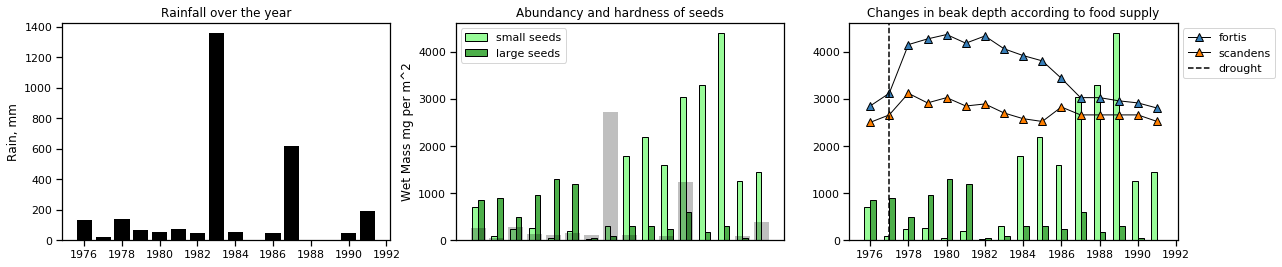

In [13]:
fig, ax = plt.subplots(1,3, figsize=(20, 4))
# rainfall plot
ax[0].bar(rainfall['Year'].astype('int64'), rainfall['Rain, mm'], color= 'k')

ax[0].set_ylabel('Rain, mm')
ax[0].set_title('Rainfall over the year')

# seeds plot as a result of rainfall quantity
ax[1].bar(seeds['Year'].astype('int64') - 0.15, seeds['small seeds'], color= 'palegreen', ec='k', width= 0.3, label= 'small seeds')
ax[1].bar(seeds['Year'].astype('int64') + 0.15, seeds['large seeds'] , color = green, ec='k', width= 0.3, label= 'large seeds')
ax[1].bar(rainfall['Year'].astype('int64'), rainfall['Rain, mm'] * 2, color= 'k', alpha = 0.25)

ax[1].set(title= 'Abundancy and hardness of seeds', ylabel= 'Wet Mass mg per m^2', xticks=[])
ax[1].legend()

# changes in beak depths respectively to seeds abundance
ax[2].bar(seeds['Year'].astype('int64') - 0.15, seeds['small seeds'], color= 'palegreen', ec='k', width= 0.3)
ax[2].bar(seeds['Year'].astype('int64') + 0.15, seeds['large seeds'], color= green, ec='k', width= 0.3)
# birds plot with power to show differences on different scale 
ax[2].plot(fortis['Year'].astype('int64')[3:19], fortis['Beak depth'].astype('float64')[3:19]**7 / 2e3, '-k^',
           lw= 1 ,markersize=8, markerfacecolor= blue, label= 'fortis'),
ax[2].plot(scandens['Year'].astype('int64')[3:19], scandens['Beak depth'].astype('float64')[3:19]**7 / 2e3, '-k^',
           lw= 1 ,markersize=8, markerfacecolor= orange, label= 'scandens'),
ax[2].axvline(1977, ls='--', color= 'k', label='drought') # drought event

ax[2].set_title("Changes in beak depth according to food supply")
ax[2].legend(bbox_to_anchor=(1, 1))

plt.show()

We can clearly see the changes in the shape of the beak when a drought took place in 1977. The drought directly caused to a shortage in food supply and available seeds became harder to crack. So, the bigger the beak the bigger the chances to survive are. That phenotype was favorable by the law of natural selection and when the population decreased, the fittest ones managed to survive and were able to pass their traits to the next generetion.

Here's a sample from the event that demonstrates this favorable trait:

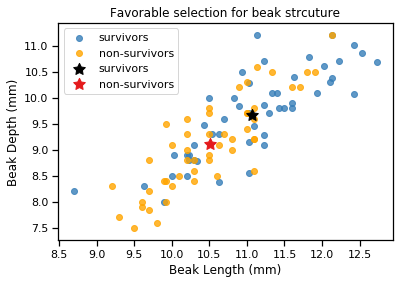

In [14]:
# 100 fortis survival data for drought occurred in 1977
drought77 = pd.read_csv('https://raw.githubusercontent.com/yuvalmargules/Final-Project/master/data/Finches_Dataset.csv')

# data division between these two groups 
nonsurvivors = drought77[:50]
survivors = drought77[50:]

plt.scatter(survivors['Beak Length (mm)'], survivors['Beak Depth (mm)'], color=blue, alpha=0.8, label='survivors')
plt.scatter(nonsurvivors['Beak Length (mm)'], nonsurvivors['Beak Depth (mm)'], color='orange', alpha=0.8, label='non-survivors')

plt.scatter(survivors['Beak Length (mm)'].mean(), survivors['Beak Depth (mm)'].mean(), s=150,
            color='k', marker=(5, 1), label='survivors')
plt.scatter(nonsurvivors['Beak Length (mm)'].mean(), nonsurvivors['Beak Depth (mm)'].mean(), s=150,
            color=red, marker=(5, 1),  label='non-survivors')

plt.title('Favorable selection for beak strcuture')
plt.ylabel('Beak Depth (mm)')
plt.xlabel('Beak Length (mm)')

plt.legend()
plt.show()

In [8]:
_, pvalue = scipy.stats.ttest_rel(survivors['Beak Depth (mm)'], nonsurvivors['Beak Depth (mm)'])
if pvalue < 0.05: 
    print(f"with p-value= {pvalue:.4f} we determine that there is a relation between beak shape and survival")
else:
    print(f"with p-value= {pvalue:.4f} we failed to reject the zero hypothesis and determine that there is a relation between beak shape and survival")

with p-value= 0.0022 we determine that there is a relation between beak shape and survival



Evolution was once thought as a long process with small changes over time toward speciation and increment of fitness. However, we have just witnessed that the drought on 1977 shaped the mean size of the beak in the population. We will use this observation to assume that: 

*drought $\to$ food shortage and harder seeds $\to$ population decreases $\to$ mean beek increases $\to$ pass to next generation*

We now understand better the main role of climate changes and their crucial impact on food supply and population growth. We take this principle into consideration and start by simulating it with simple equation to get intuition to our case.


**Quick Introduction El Niño y La Niña:** 

**El Niño** is the warm phase of the El Niño–Southern Oscillation (ENSO) and is associated with a band of warm ocean water that develops in the central and east-central equatorial Pacific. The ENSO is the cycle of warm and cold sea surface temperature of the tropical central and eastern Pacific Ocean. El Niño is accompanied by high air pressure in the western Pacific and low air pressure in the eastern Pacific.
The cool phase of ENSO is **La Niña**, with SSTs in the eastern Pacific below average, and air pressure high in the eastern Pacific and low in the western Pacific. The ENSO cycle, including both El Niño and La Niña, causes global changes in temperature and rainfall. [El Niño and La Niña Explained](https://www.youtube.com/watch?v=wVlfyhs64IY)
<img src="https://media.nationalgeographic.org/assets/photos/222/280/a73993ff-9c0a-4b5a-bd21-6511ea542891.jpg" width="450"/>
<img src="https://media.sciencephoto.com/image/c0268987/800wm" width="450"/>
<img src="https://philipshaw.ca/wp-content/uploads/2016/06/ENSO-states-viz_0.jpg" width="350"/>


So our assumptions are that during El Niño floods make seeds softer, therefore smaller beak is favorable. In opposite, during La Niña, drought make seeds harder to crack, less food is available, and this shortage depletes the population. As a result, natural selection would prefer those with the deeper beak. 

So, with first implementation:

- r - rainfall in mm in particular year, r is constant depended on X,Y
- s - the mean Beak Depth in the selected population
- X - the probability for El Niño/La Niña to occur 
- Y - coin flip between El Niño and La Niña

$$ X \sim B(1,\frac{1}{5}) $$

r | X = 0 - Regular year
$$ r \mid X = 0 \sim N(150,30^2) $$

Y | X = 1 - fair coin flip probability between El Niño/La Niña
$$ Y | X = 1 \sim B(1,\frac{1}{2}) $$

r | X = 1, Y = 1 - El Niño year(floods)
$$ r | X=1, Y=1 \sim N(700,200^2) $$

r | X = 1, Y = 0 - La Niña year(drought)
$$ r | X=1, Y=0 \sim N(4,1^2) $$


In [2733]:
## Selection Model
def simulation():
    s = [9.5] # initiate mean beak size
    r = [] # rainfall
    for _ in range(40): # over 40 years
        x = scipy.stats.binom(1,1/5).rvs(1) #  drastic climate change
        if x[0] == 0:
            r.append(scipy.stats.norm(150,30).rvs(1)[0]) # rainfall moderate year
            if r[-1] > 100:
                s.append(s[-1] - 1 / r[-1]) # new beak size
            else:
                s.append(s[-1] + 1 / r[-1])
        else:
            y = scipy.stats.binom(1,1/2).rvs(1) ## El Niño / La Niña
            if y[0] == 1: # El Niño
                r.append(scipy.stats.norm(700,200).rvs(1)[0])
                s.append(s[-1] - 1 / r[-1]**0.2)
            else:  # La Niña
                r.append(scipy.stats.norm(4,1).rvs(1)[0])
                if r[-1] > 1:
                    s.append(s[-1] + 1 / r[-1])
                else: # prevention of negatives
                    s.append(s[-1] + 0.5)
    return r,s[1:]
        

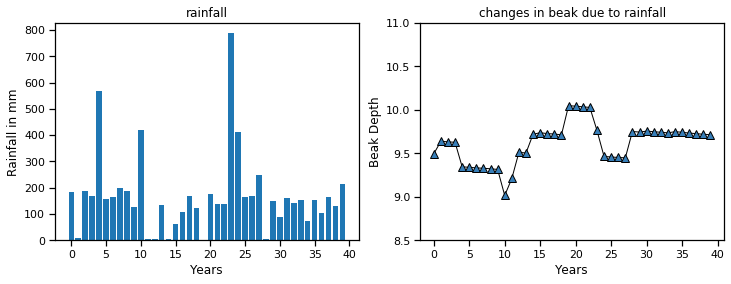

In [3286]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))

r, s = simulation() # rainfall, beak size

ax[0].bar(np.arange(40), r)
ax[1].plot(np.arange(40), s, '-k^', lw= 1 ,markersize=8, markerfacecolor= blue)

ax[0].set(title='rainfall', xlabel='Years', ylabel='Rainfall in mm')
ax[1].set(title='changes in beak due to rainfall', xlabel='Years', ylabel='Beak Depth', yticks= (np.linspace(8.5,11,6)))

plt.show()

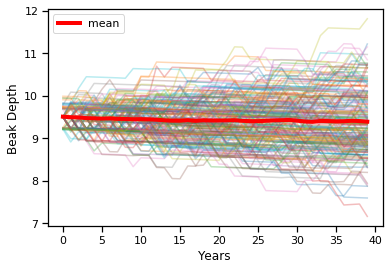

In [3067]:
# 200 simulations plot with the mean size of beak
arr = np.empty((1,40))
for i in range(200):
    arr = np.append(arr, [simulation()[1]], axis=0)
    plt.plot(np.arange(40), arr[i + 1], alpha=0.3)
    
plt.plot(np.arange(40), np.mean(arr[1:], axis=0), '-r', lw = 4, alpha=1, label='mean')

plt.xlabel('Years')
plt.ylabel('Beak Depth')

plt.legend()
plt.show()

The results are vague as we expected and could have gone either way. Also, we didn't consider competition and demonstrated only one course for each big event, but in reality things are more sophisticated. Now, we will try to combine these ideas with Lotka-Volterra Predator-Prey based model with few changes.

As seen in class:
- X - Prey
- Y - Predator


$ \frac{dx}{dt} = b x - h x y $

$ \frac{dy}{dt} = \epsilon h x y - d y $


The new model is determinstic based, with a stochastic change in climate which directly influences seeds abundance:


$ \frac{dy}{dt} = b_s y - h_s x y $

$ \frac{dz}{dt} = b_l z - h_l x z $

$ \frac{dx}{dt} = \epsilon (h_s x y + h_l x z) - d x $


where the parameters are:
- $x$ is the density of Geospiza fortis
- $y, z$ are the densities of small seeds and large seeds respectively
- $b_s, b_h $ are the *seeds* birth rate (depended on rainfall)
- $d$ is the *herbivore* death rate
- $h_s, h_l$ are the rates at which *bird* interact with a *plant* for eating
- $\epsilon$ is the rate at which *plants* density is converted to *birds* density when predation occurs

Assumptions: 
* rainfall stochasticly changes every year
* seeds are depended mainly on rainfall. It does however limits the population growth, but still independent to birds density.
* number of plants doesn't decrease through time but only their fertility


In [2734]:
def dxyz(t, xyz, b_s, b_l, h_s, h_l, ϵ, d):
    
    x, y, z = xyz
    
    if h_s * x * y < b_s * y and  h_l * x * z < b_l * z:
        dx = ϵ * (h_s * x * y + h_l * x * z) - d * x
        dy = b_s * y - h_s * x * y
        dz = b_l * z - h_l * x * z
        
    elif h_s * x * y > b_s * y:
        dy = 0
        if h_l * x * z > b_l * z:
            dz = 0
            dx = ϵ * (b_s * y + b_l * z) - d * x
        else:
            dz = b_l * z - h_l * x * z
            dx = ϵ * (b_s * y + h_l * x * z) - d * x
    else:
        dy = b_s - h_s * x * y
        dz = 0
        dx = ϵ * (h_s * x * y + b_l * z) - d * x
        
    return np.array([dx, dy, dz])

In [2749]:
# model parameters
h_s = 0.7 # small seed (prefered)
h_l = 0.4 # large seeds
ϵ = 0.03 # reproduction
d = 0.6 # death rate

r, _ = simulation() # next 40 years rainfall simulation
r = np.array(r)

steps = 10000 # total steps
year_steps = steps // 40 # steps per year
xyz = np.empty((3, steps + 1)) # population array
xyz[:,0] = 200, 400, 400 # initial population sizes
dt = 0.01 # time step

t = 1 # first step
extincted = 0 # extinction flag

large = [1000] # seeds record
small = [1000]

for rain in r: # for every year of rain
    
    if rain > 250: # floods
        b_s = rain**1.3 / year_steps
        b_l = rain**1.1 / year_steps
        
    elif rain > 20: # moderate
        uniform = scipy.stats.uniform(loc=0, scale=0.4).rvs(2) # with small random changes
        b_s = (rain**uniform[0] + small[-1] / year_steps) / 2 # uses last year rainfall data for changes to be smoother
        b_l = (rain**(uniform[1]) + large[-1] / year_steps) / 2 # e.g a drought after flood won't be immidietly desolation
    
    else: # drought
        uniform = scipy.stats.uniform(loc=0, scale=1).rvs(2)
        b_s = (rain + small[-1]**uniform[0]) / year_steps
        b_l = (rain + large[-1]**uniform[1]) / year_steps
    
    large.append(b_l * year_steps)
    small.append(b_s * year_steps)
    
    for i in range(t, year_steps + t): # number of steps in each year
        xyz[:, i] = xyz[:, i-1] + dxyz(t, xyz[:, i-1], b_s, b_l, h_s, h_l, ϵ, d) * dt
       
        if xyz[0, i] < 0: # extinction occurred
            xyz[0, i:] = 0
            xyz[1, i:] += xyz[1, i-1]
            xyz[2, i:] += xyz[2, i-1]
            extincted = 1
            print("Extincted")
            break
            
    if extincted == 1:
        break
    t += year_steps

x = xyz[0, :] 
y = xyz[1, :] 
z = xyz[2, :] 

small = np.array(small[1:])
large = np.array(large[1:])
t = np.linspace(0, 40, steps)

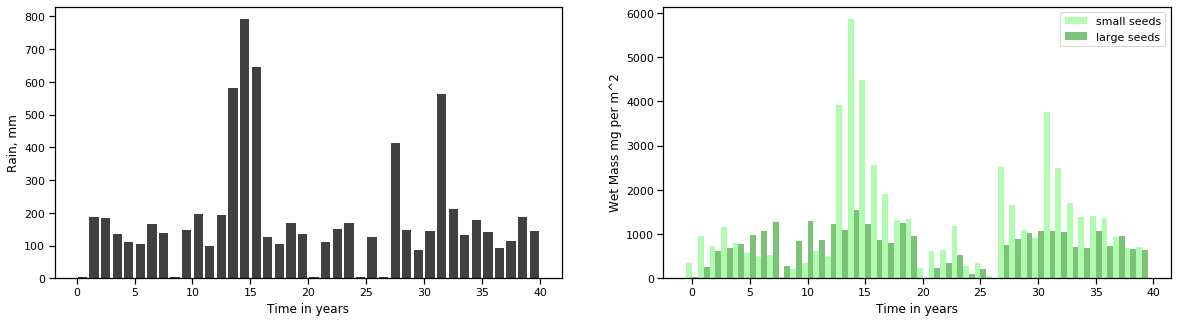

In [2751]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
# rainfall plot
years = np.arange(0,40,1)
ax[0].bar(years + 0.5, r, alpha=0.75, label='rainfall', color='k')
ax[0].set_xlabel('Time in years')
ax[0].set_ylabel('Rain, mm')

# seeds plot according to rainfall
ax[1].bar(years - 0.25, small, color= 'palegreen', alpha= 0.75, width= 0.5, label= 'small seeds')
ax[1].bar(years + 0.25, large, color= green, alpha= 0.75, width= 0.5, label= 'large seeds')
ax[1].set_xlabel('Time in years')
ax[1].set_ylabel('Wet Mass mg per m^2')
ax[1].legend()

plt.show()

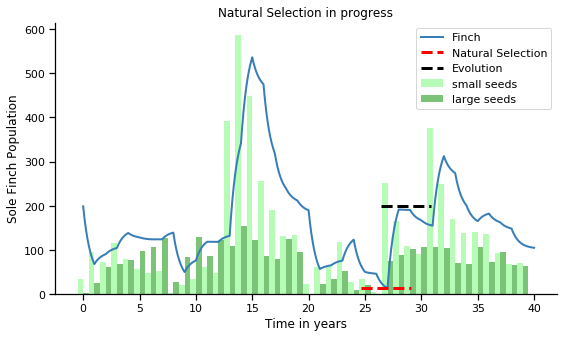

In [2757]:
plt.figure(figsize=(9,5))
# seeds plot
plt.bar(years - 0.25, small / 10, color= 'palegreen', alpha= 0.7, width= 0.5, label= 'small seeds')
plt.bar(years + 0.25, large / 10, color= green, alpha= 0.75, width= 0.5, label= 'large seeds')
# finches population
plt.plot(t, x[1:], color = blue, lw= 2, label= 'Finch')
# critical points for beak's new shape
plt.axhline(np.min(x),0.61, 0.71, lw=3, ls='--', color='r', label='Natural Selection')
plt.axhline(200 ,0.65, 0.75, lw=3, ls='--', color='k', label='Evolution')

plt.title("Natural Selection in progress")
plt.xlabel('Time in years')
plt.ylabel('Sole Finch Population')


plt.legend(bbox_to_anchor=(1, 1))
sns.despine()
plt.show()

This selection state presents changes we have previously seen. The drought led to a shortage in food sources and with the lack of food, decrease in population was inevitable. Now, when the selection pressure is high there are two options:
- only small population will pass their genes to the next generation
- they will all extinct

The former let the survivors, whom had an advantage among the population, pass their genes to the next generation, while the latter leads to extinction of the species. With their absence, new dynamics would emerge in the eco-system. Though, We still lack competition in our equations as we assumed only the influence of climate 

Lets take another glance on data to search for new insights and try to understand it better

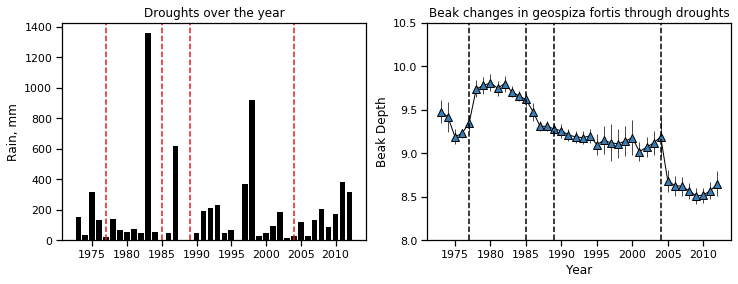

In [3287]:
# previous plot with more axvlines for each drought
fig, ax = plt.subplots(1,2, figsize=(12, 4))

ax[0].bar(rain_data['Year'].astype('int64'), rain_data['Rain, mm'], color= 'k')

ax[0].set_ylabel('Rain, mm')
ax[0].set_title('Droughts over the year')


ax[1].plot(fortis['Year'].astype('int64'), fortis['Beak depth'].astype('float64'), '-k^',
           lw= 1 ,markersize=8, markerfacecolor= blue, label= 'fortis'),
ax[1].errorbar(fortis['Year'].astype('int64'), fortis['Beak depth'].astype('float64'),
               fortis['CI Beak depth'].astype('float64'), ls='',color = 'k', elinewidth= 0.7)                 

ax[1].set(title='Beak changes in geospiza fortis through droughts', xlabel='Year', ylabel = 'Beak Depth', yticks= np.arange(8,11,0.5))


for drought in [1977, 1985,1989, 2004]:
    ax[0].axvline(drought, ls= '--', color = red)
    ax[1].axvline(drought, ls= '--', color = 'k')

plt.show()

As a matter of fact, same kind of events on different times led to different consequences. As described:

### Selection Oscillates In Direction
"By extending the study beyond the first few years, we learned that selection changes direction. Changes in the terrestrial environment are driven by interannual variation in rainfall. The environment changed profoundly in 1982–83 with abundant rain
(1,359 mm) and a prolonged wet season (eight months) associated with an exceptional El Niño event (Gibbs and Grant 1987a).
This transformed the composition of the seed supply from one dominated by large and hard seeds to one dominated by small and soft seeds. There was no immediate selective effect on fortis; survival was high, and effects were delayed. In the following year 53 mm of rain fell, and finches bred once or twice, but then a drought began, and the island received a mere 4 mm of rain in two days throughout the whole of 1985. The drought ended in 1986 with the return of rain (49 mm)
and a partial resumption of breeding, which was almost entirely
unsuccessful" (Grant and Grant, 40 years of evolution)

## Competitive Lotka–Volterra equations
Another model for population dynamics describes species competing for some common resource, a variable we didn't consider before. We will implement the model as it is to get a better intuition about dynamics in terms of competition, and invasion.



$ \frac{dx_1}{dt} = r_1 x_1 (1 - ( \frac{x_1 + \alpha_{12} x_2}{K_1}) $

$ \frac{dx_2}{dt} = r_2 x_2 (1 - ( \frac{x_2 + \alpha_{21} x_1}{K_2}) $

- x - size of the population at a given time
- r - inherent per-capita growth rate
- K - carrying capacity
- α12 - represents the effect species 2 has on the population of species 1
- α21 - represents the effect species 1 has on the population of species 2

<img src="https://www.susanfleck.com/Birds/Birds_images_17_Galapagos/Finch_Large_Ground_5707284b.jpg" width="300">
it was on 1983 after El Niño when suddenly 5 finches from a new species, Geospiza Magnirostris, established a breeding population on the island. And what we are interested about is the shape of the beak. It's feeded mostly by large seeds, so on the one hand they have an advantage for cracking seed, and on the other hand disadvantage with the lack of those seeds.
With the equations above we will simulate the invasion, alongside the fact that fortis is also feeded by large seeds and is inferior.

In [3068]:
def dx1x2dt(t, x1x2, α12, α21, r1, r2, K1, K2):
    x1, x2 = x1x2
    dx1 = r1*x1 * (1 - ((x1 + α12*x2) / K1))
    dx2 = r2*x2 * (1 - ((x2 + α21*x1) / K2))
    return np.array([dx1, dx2])


In [3389]:
# model parameters
r1, r2 = 0.9, 0.7 # reproduction rate
α12, α21 = 1.4, 0.2 # influence coeffiecients
K1, K2 = 700,400 # carrying capacity

steps = 50000 # number integration steps
x1x2 = np.empty((2, steps)) # population array
x1x2[:,0] = 205, 27 # initial population sizes
dt = 0.001 # time step for integration
for t in range(1, steps):
    x1x2[:, t] = x1x2[:, t-1] + dx1x2dt(t, x1x2[:, t-1], α12, α21, r1, r2, K1, K2) * dt

x1 = x1x2[0, :]
x2 = x1x2[1, :]
t = np.arange(0, dt * steps, dt)

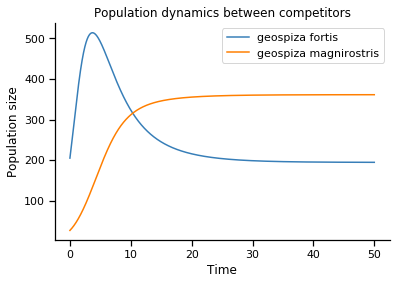

In [3390]:
plt.plot(t, x1, color=blue, label='geospiza fortis')
plt.plot(t, x2, color=orange, label='geospiza magnirostris')

plt.title('Population dynamics between competitors')
plt.xlabel('Time')
plt.ylabel('Population size')

plt.legend(bbox_to_anchor=(1, 1))
sns.despine()


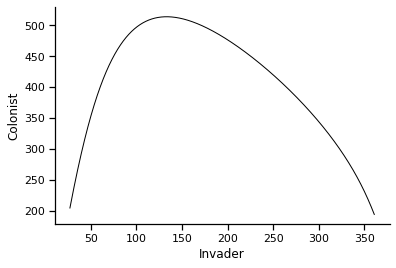

In [3391]:
plt.plot(x2, x1, linewidth=1, color='k')
plt.xlabel('Invader')
plt.ylabel('Colonist')
sns.despine()


**Equilibrium:**

$ \frac{dx_1}{dt} = r_1 x_1 (1 - ( \frac{x_1 + \alpha_{12} x_2}{K_1}) = 0
\to x_1 = K_1 - \alpha_{12}x_2, \;\; x_2 = \frac{K_1 - x_1}{\alpha_{12}} $

$ \frac{dx_2}{dt} = r_2 x_2 (1 - ( \frac{x_2 + \alpha_{21} x_1}{K_2}) = 0
\to {x_2} = K_2 - \alpha_{21}x_1, \;\; x_1 = \frac{K_2 - x_2}{\alpha_{21}} $

**Stable equilibrium:**

$ \frac{dx_1}{dt} = \frac{dx_2}{dt} $


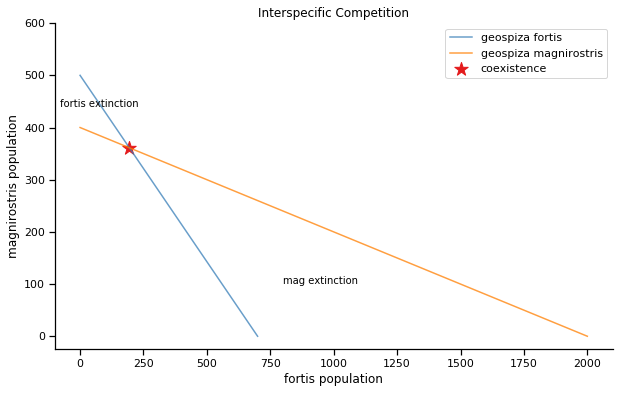

In [3392]:
plt.figure(figsize=(10,6))

dx1 = np.array([[0, K1], [K1 / α12, 0]])
dx2 = np.array([[K2 / α21, 0], [0, K2]])

m1 = (dx1[1,1] - dx1[1,0]) / (dx1[0,1] - dx1[0,0])
m2 = (dx2[1,1] - dx2[1,0]) / (dx2[0,1] - dx2[0,0])

n1 = K1 / α12
n2 = K2

x_eq = (n2 - n1) / (m1 - m2)
y_eq = m1 * x_eq + n1
equilibrium = [x_eq, y_eq]

plt.plot(dx1[0], dx1[1], alpha= 0.75, color=blue, label='geospiza fortis')
plt.plot(dx2[0], dx2[1], alpha= 0.75, color=orange, label='geospiza magnirostris')
plt.scatter(equilibrium[0], equilibrium[1], marker='*', color =red, s=200, label= 'coexistence')

plt.annotate('fortis extinction', (-80,440))
plt.annotate('mag extinction', (800,100))

plt.title('Interspecific Competition')
plt.xlabel('fortis population')
plt.ylabel('magnirostris population')
plt.yticks(np.arange(0, 700, 100))

sns.despine()
plt.legend()
plt.show()

#### We will extend the equations now to N species, for species live on Daphne Major, with the invasion of Magnirostris, by their diet ####
<!-- 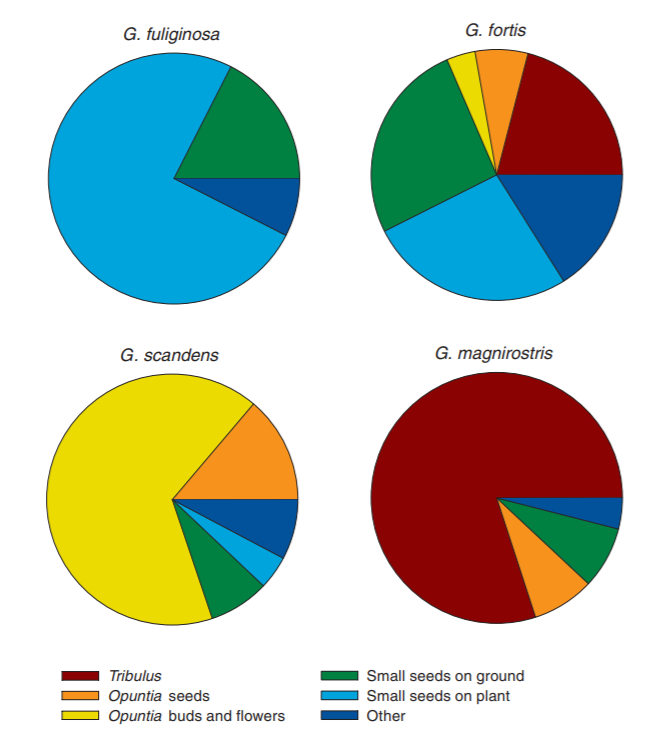 -->


<div> 
    
    
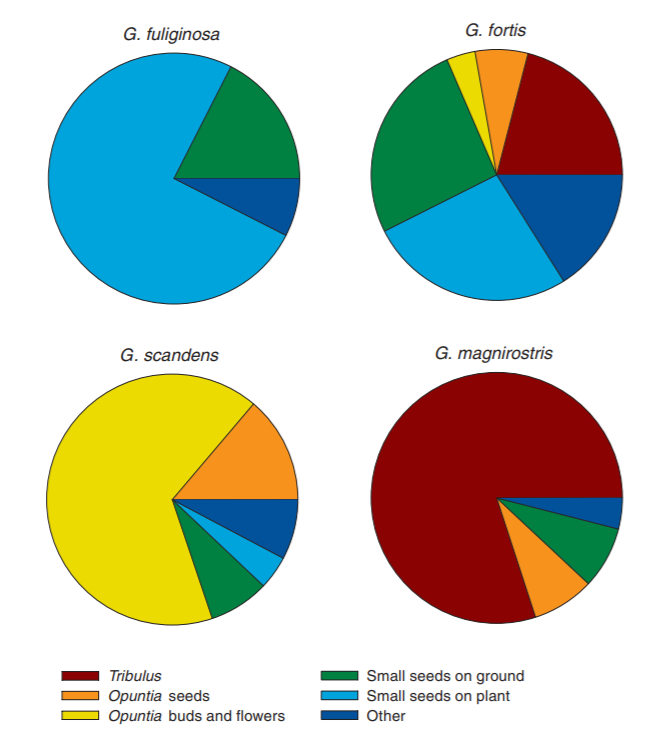
    
    
</div>
  
   
$ r= \begin{pmatrix}
       r_1 \\
       r_2 \\
       : \\
       r_N
      \end{pmatrix},  X= \begin{pmatrix}
       x_1 \\
       x_2 \\
       : \\
       x_N
      \end{pmatrix} ,
        \alpha= \begin{pmatrix}
            \alpha_{11} & \alpha_{12} & .. & \alpha_{1j} & .. & \alpha_{1N} \\
            \alpha_{21} & \alpha_{22} & .. & \alpha_{2j} & .. &\alpha_{2N} \\
            : & : & . & : & . & : \\
            \alpha_{i1} & \alpha_{i2} & .. & \alpha_{ij} & .. & \alpha_{iN} \\
            : & : & . & : & . & : \\
            \alpha_{N1} & \alpha_{N2} & .. & \alpha_{Nj} & .. & \alpha_{NN} \\
           \end{pmatrix} $


$ \frac{dx_i}{dt} = r_i x_i (1 - \frac{\sum_{j=1}^N{\alpha_{ij} x_j}}{K_i}) $



$$ \frac{dX}{dt} = \begin{pmatrix}
       r_1 \\
       r_2 \\
       : \\
       r_N
      \end{pmatrix} \cdot 
      \begin{pmatrix}
       x_1 \\
       x_2 \\
       : \\
       x_N
      \end{pmatrix} 
      \cdot (
      \begin{pmatrix}
       I_1 \\
       I_2 \\
       : \\
       I_N
      \end{pmatrix} 
      -   
      \begin{pmatrix}
            \alpha_{11} & \alpha_{12} & .. &  \alpha_{1N} \\
            \alpha_{21} & \alpha_{22} & .. & \alpha_{2N} \\
            : & : & . & : \\
            \alpha_{N1} & \alpha_{N2} & .. &  \alpha_{NN} \\
           \end{pmatrix} 
      \cdot
      \begin{pmatrix}
       x_1 \\
       x_2 \\
       : \\
       x_N
      \end{pmatrix} )  
      =
      \begin{pmatrix}
      \frac{dx_1}{dt} \\
      \frac{dx_2}{dt} \\
      : \\
      \frac{dx_N}{dt} \\
      \end{pmatrix} $$
      

In [2]:
def dXdt(t, X, α, r, K):
    
    dX = X * r * (np.ones(4) - np.dot(α, X) / K) # [n,1] * [n,1] * ([n,1] - [n,n] @ [n,1] / [n,1]
                                                 # = [n,1] * ([n,1] - [n,1] / [n,1]) = [n,1] * [n,1] = [n,1]
    return dX

In [5]:
# model parameters
r = np.array([0.7, 0.9, 1, 1]) # magnirostris, fortis, scandens, fuliginosa
α = np.array([[1.  , 0.5 , 0.01, 0. ], # effect on species 1
             [1.4 , 1.  , 0.3 , 0.1 ], # effect on species 2
             [0.2 , 0.5 , 1.  , 0.4 ], # effect on species 3
             [0.1 , 1.  , 1.1 , 1.  ]])# effect on species 4
K = np.array([400, 700, 500, 700]) # max population

steps = 200000 # number integration steps
X = np.empty((4, steps)) # population array
X[:,0] = 5, 200, 120, 100 # initial population sizes
dt = 0.001 # time step for integration

for t in range(1, steps):
    X[:, t] = X[:, t-1] + dXdt(t, X[:, t-1], α, r, K) * dt

t = np.linspace(0, 40, steps)

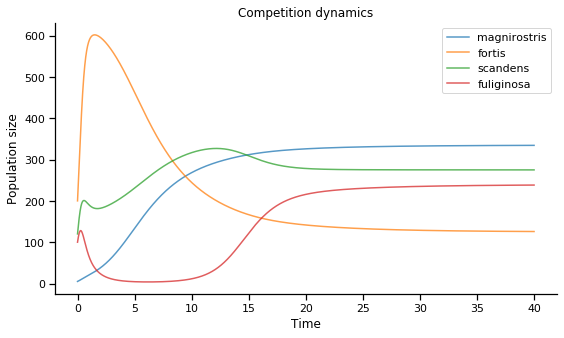

In [6]:
plt.figure(figsize=(9,5))

competitor = ['magnirostris', 'fortis', 'scandens', 'fuliginosa']

for i in range(X.shape[0]):    
    plt.plot(t, X[i,:], alpha=0.75, label=competitor[i])

plt.title('Competition dynamics')
plt.xlabel('Time')
plt.ylabel('Population size')
# bbox_to_anchor places the legend at specific position, in this case outside the plot
sns.despine()
plt.legend()
plt.show()

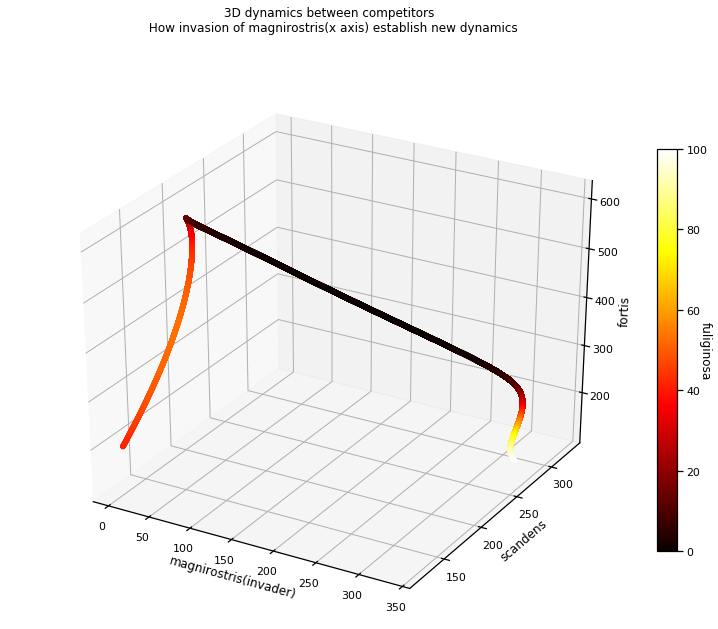

In [3375]:
# 3D plot with 4th dimensions expressed by color for population dynamics
fig = plt.figure(figsize = (12,10 ))
ax = fig.gca(projection = '3d')

ts = t
points = X
x1 = X[0]
x2 = X[1]
x3 = X[2]
x4 = X[3]
colors = x4 / max(x4)

cx1 = CubicSpline(t, x1)
cx2 = CubicSpline(t, x2)
cx3 = CubicSpline(t, x3)
cx4 = CubicSpline(t, x4)

fine_x1 = [cx1(t) for t in ts]
fine_x2 = [cx2(t) for t in ts]
fine_x3 = [cx3(t) for t in ts]
fine_x4 = [cx4(t) for t in ts]
fine_colors = (fine_x4 - np.min(fine_x4)) / (np.max(fine_x4) - np.min(fine_x4))

ax.plot(x1, x3, x2)
sc = ax.scatter(fine_x1, fine_x3, fine_x2, c = cm.hot(fine_colors))

fig.suptitle('3D dynamics between competitors \n How invasion of magnirostris(x axis) establish new dynamics')
ax.set(xlabel='magnirostris(invader)', ylabel='scandens', zlabel='fortis')

norm = mpl.colors.Normalize(vmin=0,vmax=100)
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cm.get_cmap('hot'), norm=norm), fraction=0.03, pad=0.001)
cbar.ax.set_ylabel('fuliginosa', rotation=270)


plt.show()

**and indeed**, we can see that competition made adaptations in diet, and through the course we learned that diet is highly correlated with the shape of the beak. Here's the new diet:

**Not to mention** that recurrent competition happen on different locations with different conditions and as a result **same species seem to differ with their beaks** on different locations.

<div>
    
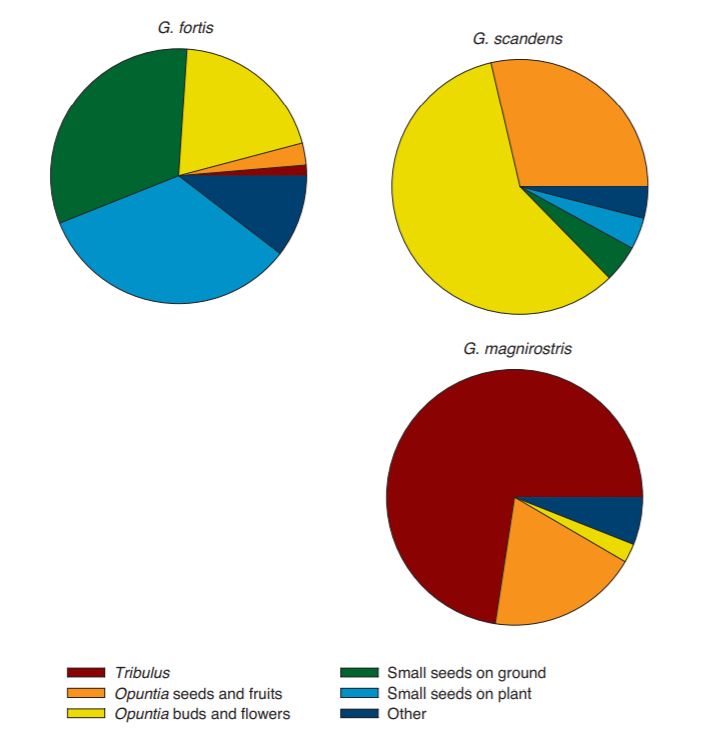
    
</div>
<!-- 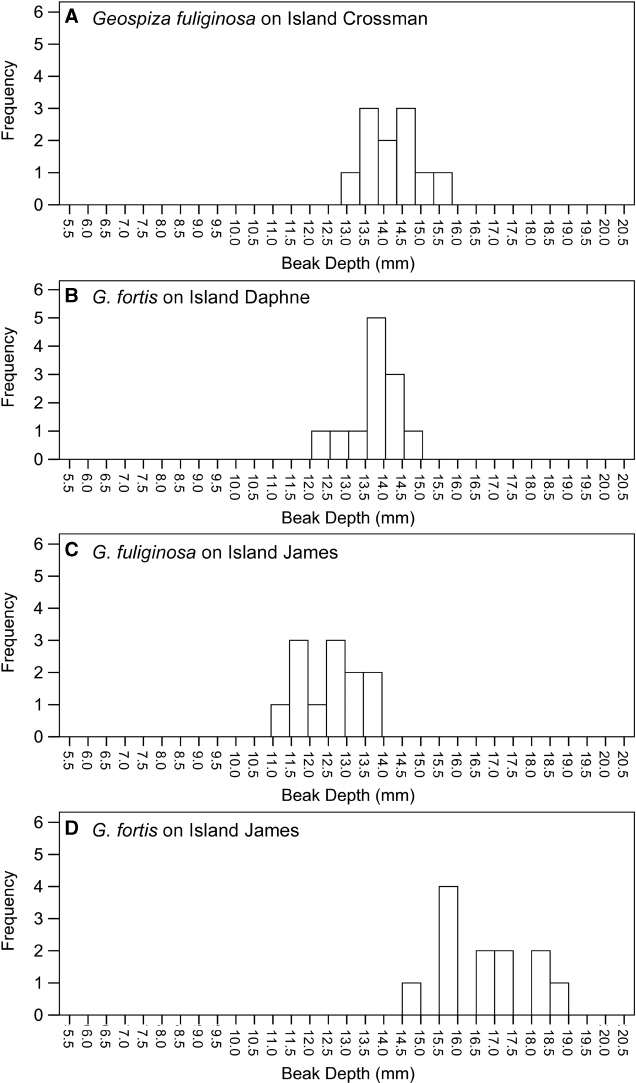
 -->
 
<div>
    
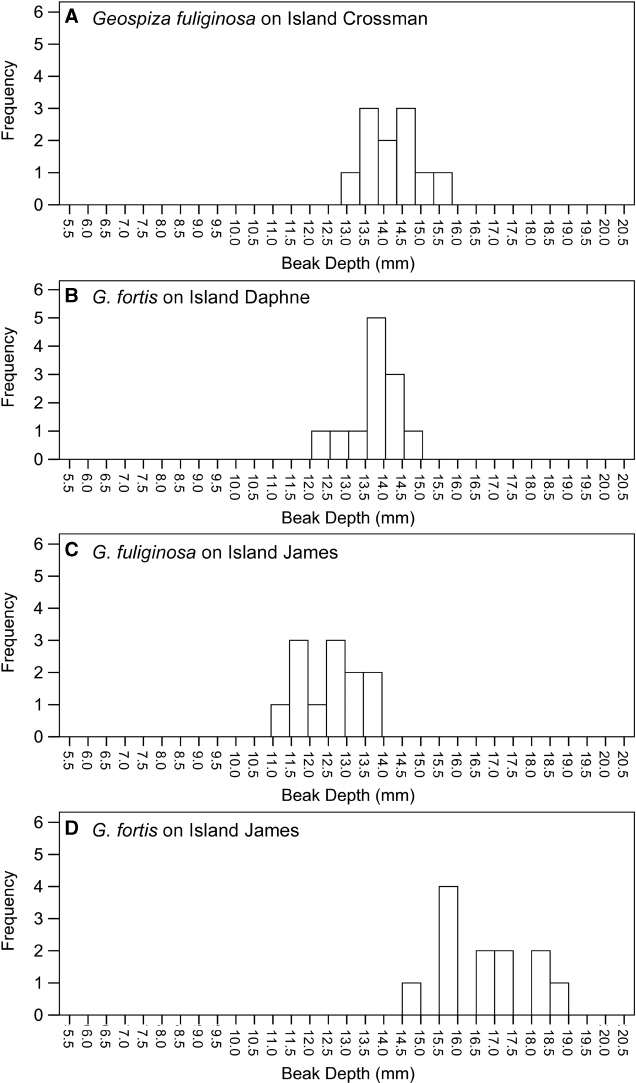
    
</div>


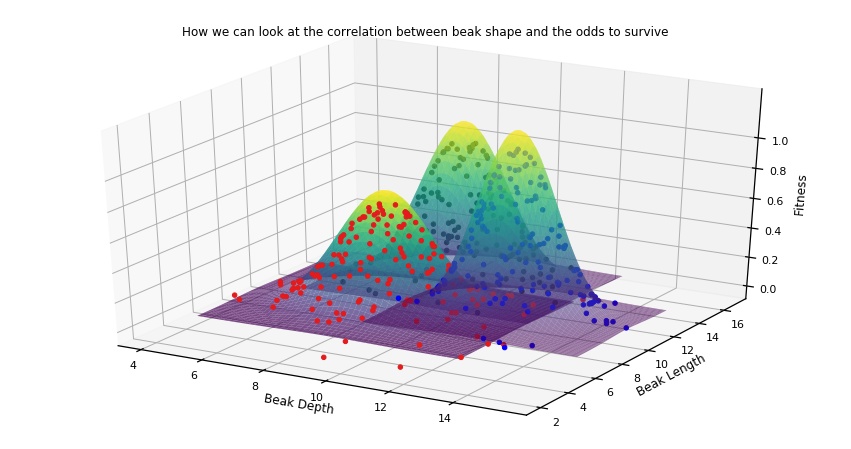

In [3401]:
# 3D hypotetical plot between beak shape and the probability to survive
bd1 = scipy.stats.norm(12,1.3)
bl1 = scipy.stats.norm(10,1.3)

bd2 = scipy.stats.norm(9,1.5)
bl2 = scipy.stats.norm(13,1.5)

bd3 = scipy.stats.norm(8.5,2)
bl3 = scipy.stats.norm(8.5,2)

x1 = bd1.rvs(150)
y1 = bl1.rvs(150)
d1 = {'x': x1, 'y': y1}
df1 = pd.DataFrame(data=d1)

x2 = bd2.rvs(150)
y2 = bl2.rvs(150)
d2 = {'x': x2, 'y': y2}
df2 = pd.DataFrame(data=d2)

x3 = bd3.rvs(150)
y3 = bl3.rvs(150)
d3 = {'x': x3, 'y': y3}
df3 = pd.DataFrame(data=d3)

mu11 = 12
mu12 = 10
mu21 = 9
mu22 = 13
mu31 = 8.5
mu32 = 8.5

sig11 = 1.3
sig12 = 1.3
sig21 = 1.5
sig22 = 1.5
sig31 = 2
sig32 = 2

p1 = ((df1['x'] - mu11) * (df1['y'] - mu12)).sum() / 100
p2 = ((df2['x'] - mu21) * (df2['y'] - mu22)).sum() / 100
p3 = ((df3['x'] - mu31) * (df3['y'] - mu32)).sum() / 100

x = np.linspace(mu11 - 3*np.sqrt(sig11),mu11 + 3*np.sqrt(sig11), 100)
y = np.linspace(mu12 - 3*np.sqrt(sig12),mu12 + 3*np.sqrt(sig12), 100)
X, Y = np.meshgrid(x, y)
Z = multivariate_normal([mu11, mu12], [[sig11, p1], [p1, sig12]])
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

x2 = np.linspace(mu21 - 3*np.sqrt(sig21),mu21 + 3*np.sqrt(sig21), 100)
y2 = np.linspace(mu22 - 3*np.sqrt(sig22),mu22 + 3*np.sqrt(sig22), 100)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = multivariate_normal([mu21, mu22], [[sig21, p2], [p2, sig22]])
pos2 = np.empty(X2.shape + (2,))
pos2[:, :, 0] = X2; pos2[:, :, 1] = Y2

x3 = np.linspace(mu31 - 3*np.sqrt(sig31),mu31 + 3*np.sqrt(sig31), 100)
y3 = np.linspace(mu32 - 3*np.sqrt(sig32),mu32 + 3*np.sqrt(sig32), 100)
X3, Y3 = np.meshgrid(x3, y3)
Z3 = multivariate_normal([mu31, mu32], [[sig31, p3], [p3, sig32]])
pos3 = np.empty(X3.shape + (2,))
pos3[:, :, 0] = X3; pos3[:, :, 1] = Y3

z1 = Z.pdf(df1)
z2 = Z2.pdf(df2)
z3 = Z3.pdf(df3)

fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.pdf(pos) * 10 ,cmap='viridis',linewidth=3, alpha=0.55)
ax.plot_surface(X2, Y2, Z2.pdf(pos2) * 10 ,cmap='viridis',linewidth=3, alpha=0.55)
ax.plot_surface(X3, Y3, Z3.pdf(pos3) * 10 ,cmap='viridis',linewidth=3, alpha=0.7)

ax.scatter(df1['x'], df1['y'], z1 * 9, color='b', marker='o', alpha= 1)
ax.scatter(df2['x'], df2['y'], z2 * 9, color='k', marker='o', alpha= 1)
ax.scatter(df3['x'], df3['y'], z3 * 9, color=red, marker='o', alpha= 1)

ax.set_title('How we can look at the correlation between beak shape and the odds to survive')
ax.set_xlabel('Beak Depth')
ax.set_ylabel('Beak Length')
ax.set_zlabel('Fitness')
ax.set_zticks(np.arange(0,1.05,0.2))

plt.show()

In conclusion, we can see one's changes as an influence on fitness level and the probability to survive. We may stop at local maxima, and through condition changes search our way to maximize our odds to pass our genes. Environmental conditions make new dynamics emerge constantly, which change the terrain(the graph above) where the fittest would survive.  

The results we got through the course would be concluded with the phrase "selection oscillates in direction". Results we have faced:
* climate changes indirectly affected birds population with monitoring food supply
* decrease in population with the help of natural selection defined new favorable trait which would spread out
* invasion changed dynamics where one who doesn't make adaptations may extinct

The results get along with the hypothesis except one part which struck me- every single time appears to have different dynamics and it's sufficient to have a slight change in order to get an utterly different result e.g extinction of population, unseccessful invasion. At last, there are more variables we didn't take into consideration and are worth future investigation.


**References:**
- 40 Years of Evolution: Darwin's Finches on Daphne Major Island Peter R. Grant and B. Rosemary Grant 
- [INTERSPECIFIC COMPETITION: LOTKA-VOLTERRA](http://www.tiem.utk.edu/~gross/bioed/bealsmodules/competition.html)
- [Lotka-Volterra](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)
- [Competitive Lotka–Volterra equations](https://en.wikipedia.org/wiki/Competitive_Lotka%E2%80%93Volterra_equations)
- [On the Origin of Species](https://en.wikipedia.org/wiki/On_the_Origin_of_Species)
